In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


def load(path: str) -> pd.DataFrame:
    """Load a CSV file into a Dataset object.

    Args:
        path (str): path to the CSV file

    Returns:
        Dataset: object containing the data
    """
    try:
        if not path.lower().endswith(("csv")):
            raise AssertionError("Only csv formats are supported.")
        local_dir = os.path.abspath('')
        file_path = os.path.join(local_dir, path)
        if not os.path.exists(file_path) or os.path.isdir(file_path):
            raise AssertionError("File not found:", file_path)
        df = pd.read_csv(file_path)
        return df
    except AssertionError as error:
        print(f"{AssertionError.__name__}: {error}")
        return None

In [2]:
test_knight = load("../Test_knight.csv")
train_knight = load("../Train_knight.csv")

In [13]:
data = train_knight[train_knight.columns[:-1]]
knight = train_knight[train_knight.columns[-1]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) 

   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0    -0.672190 -0.447007 -0.701691 -0.647079 -0.408080  -0.812359  -0.770179   
1     1.671168  0.731340  1.624479  1.798709  0.139449  -0.019929   0.742230   
2    -0.915010 -0.461465 -0.851698 -0.825470 -0.534659   0.148840   0.066543   
3    -0.724850 -0.225314 -0.654097 -0.715305  1.551689   0.874940   0.160680   
4    -0.830169  0.172288 -0.869971 -0.776442 -0.831973  -1.169325  -1.067454   

   Prescience  Reactivity  Midi-chlorien  ...     Evade     Stims    Sprint  \
0   -0.867035    0.173459      -0.366543  ... -0.172521 -0.651490 -0.581014   
1    1.222095   -0.826745      -1.308423  ...  0.896162  2.461756  2.839651   
2   -0.342094   -1.177761       0.570808  ...  0.225517 -0.523624 -0.740496   
3    0.176467    0.588639       1.499103  ... -0.020330 -0.585395 -0.644173   
4   -1.151858   -0.619156       0.122510  ...  0.151931 -0.948607 -0.815952   

      Combo     Delay  Attunement  Empowered

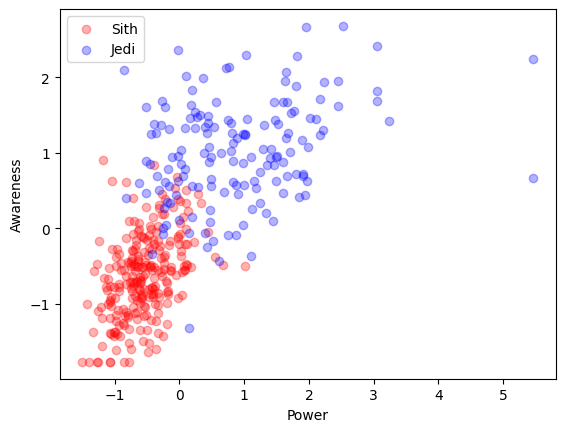

In [16]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
data_joint = pd.concat([pd.DataFrame(scaled_data), knight], axis=1)

colors = {'Sith': 'red', 'Jedi': 'blue'}
knight_types = train_knight['knight'].unique()

for knight_type in knight_types:
    subset2 = data_joint[data_joint['knight'] == knight_type]  
    plt.scatter(subset2['Power'], subset2['Empowered'], label=knight_type, c=colors[knight_type], alpha=0.3)

plt.xlabel('Power')
plt.ylabel('Awareness')

plt.legend()

plt.show()

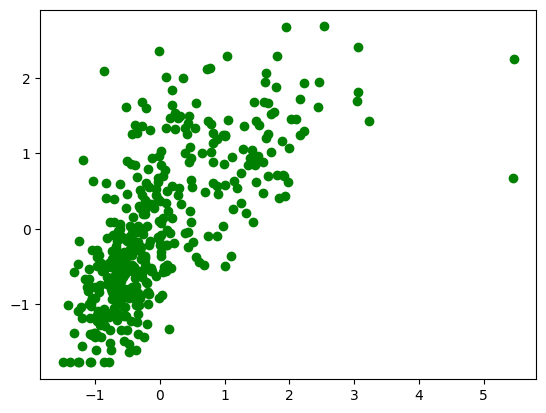

In [18]:
plt.scatter(scaled_data['Power'], scaled_data['Empowered'], c='green')